<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/proyek/ocr-ktp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import liblary dan mempersiapkan data

In [1]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
image = cv2.imread('KTP_Farhan.jpg')

In [3]:
image.shape

(1600, 1200, 3)

## Clustering

In [4]:
def cluster_image(image):
  X = image.reshape(-1,3)
  kmeans = KMeans(n_clusters = 2, n_init=10)

  kmeans.fit(X)
  clustered_image = kmeans.cluster_centers_[kmeans.labels_]
  clustered_image = clustered_image.reshape(image.shape)

  return clustered_image

In [5]:
clustered_image = cluster_image(image)

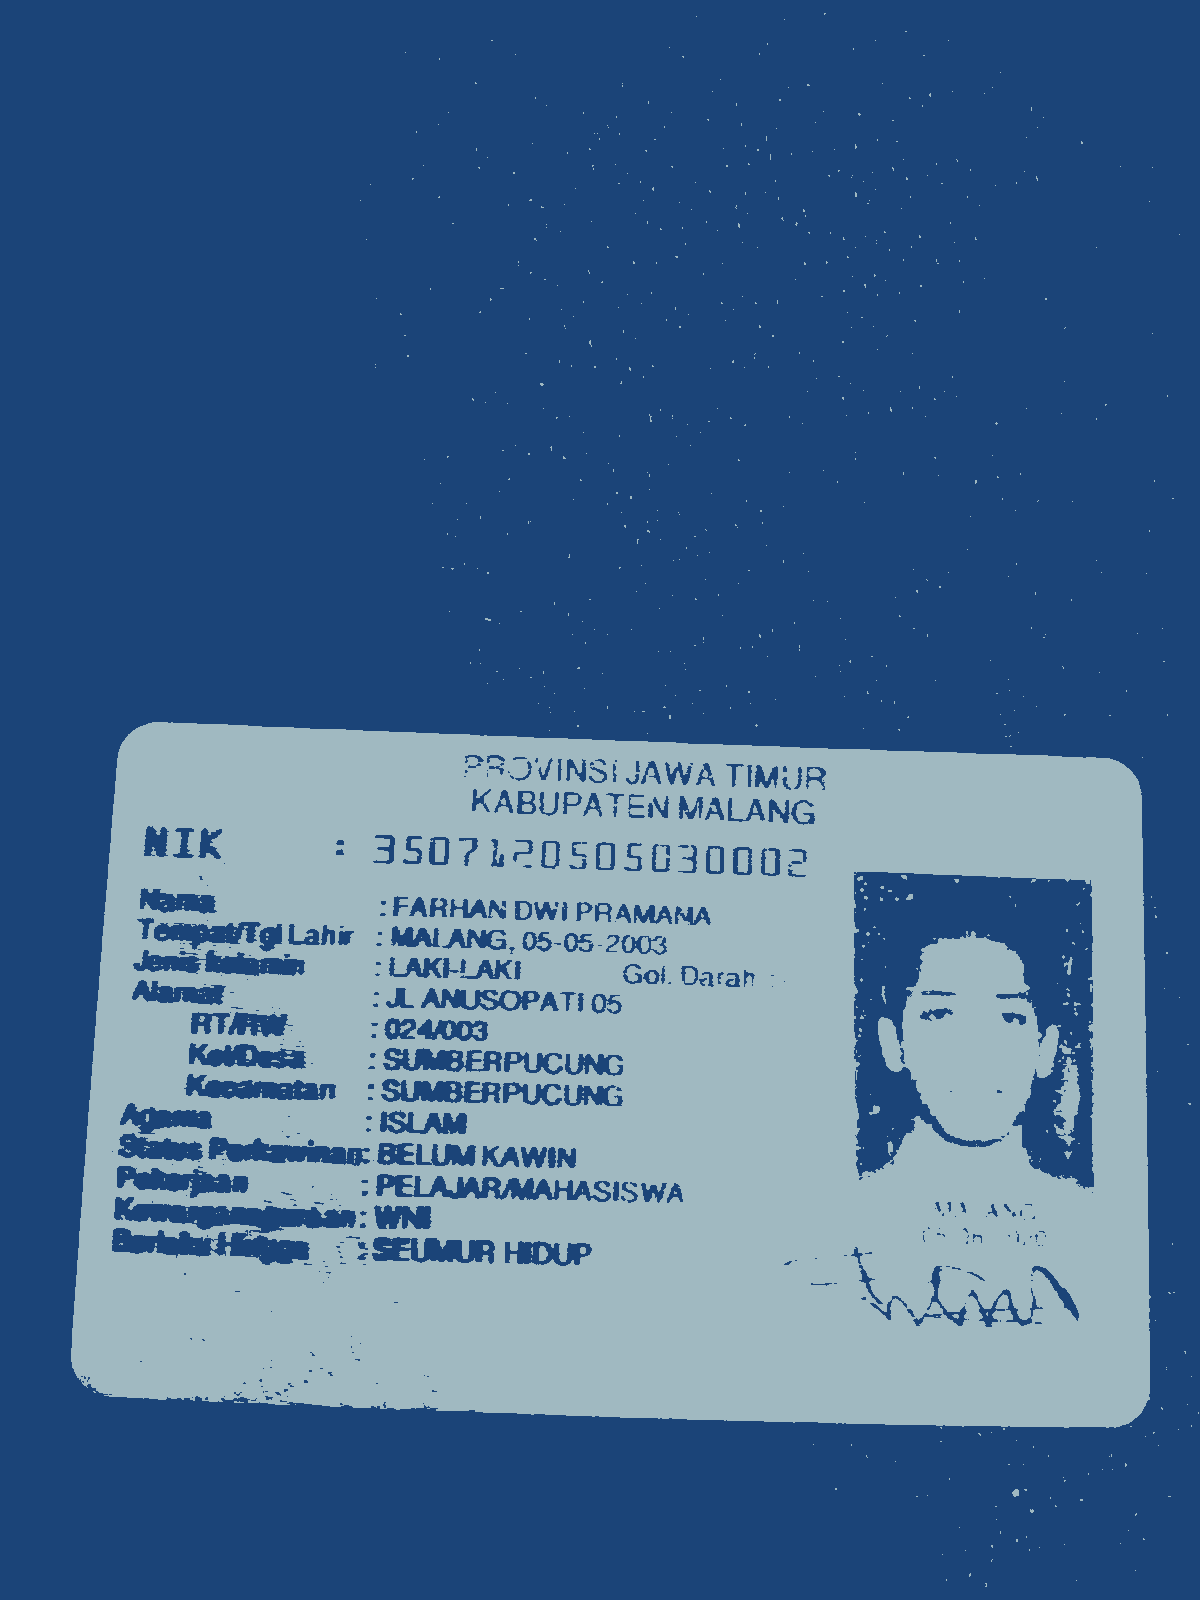

In [6]:
cv2_imshow(clustered_image)

In [7]:
clustered_image.shape

(1600, 1200, 3)

## Grayscale

In [8]:
clustered_image = clustered_image.astype(np.uint8)

# Option 1: Using OpenCV cvtColor
gray = cv2.cvtColor(clustered_image, cv2.COLOR_BGR2GRAY)

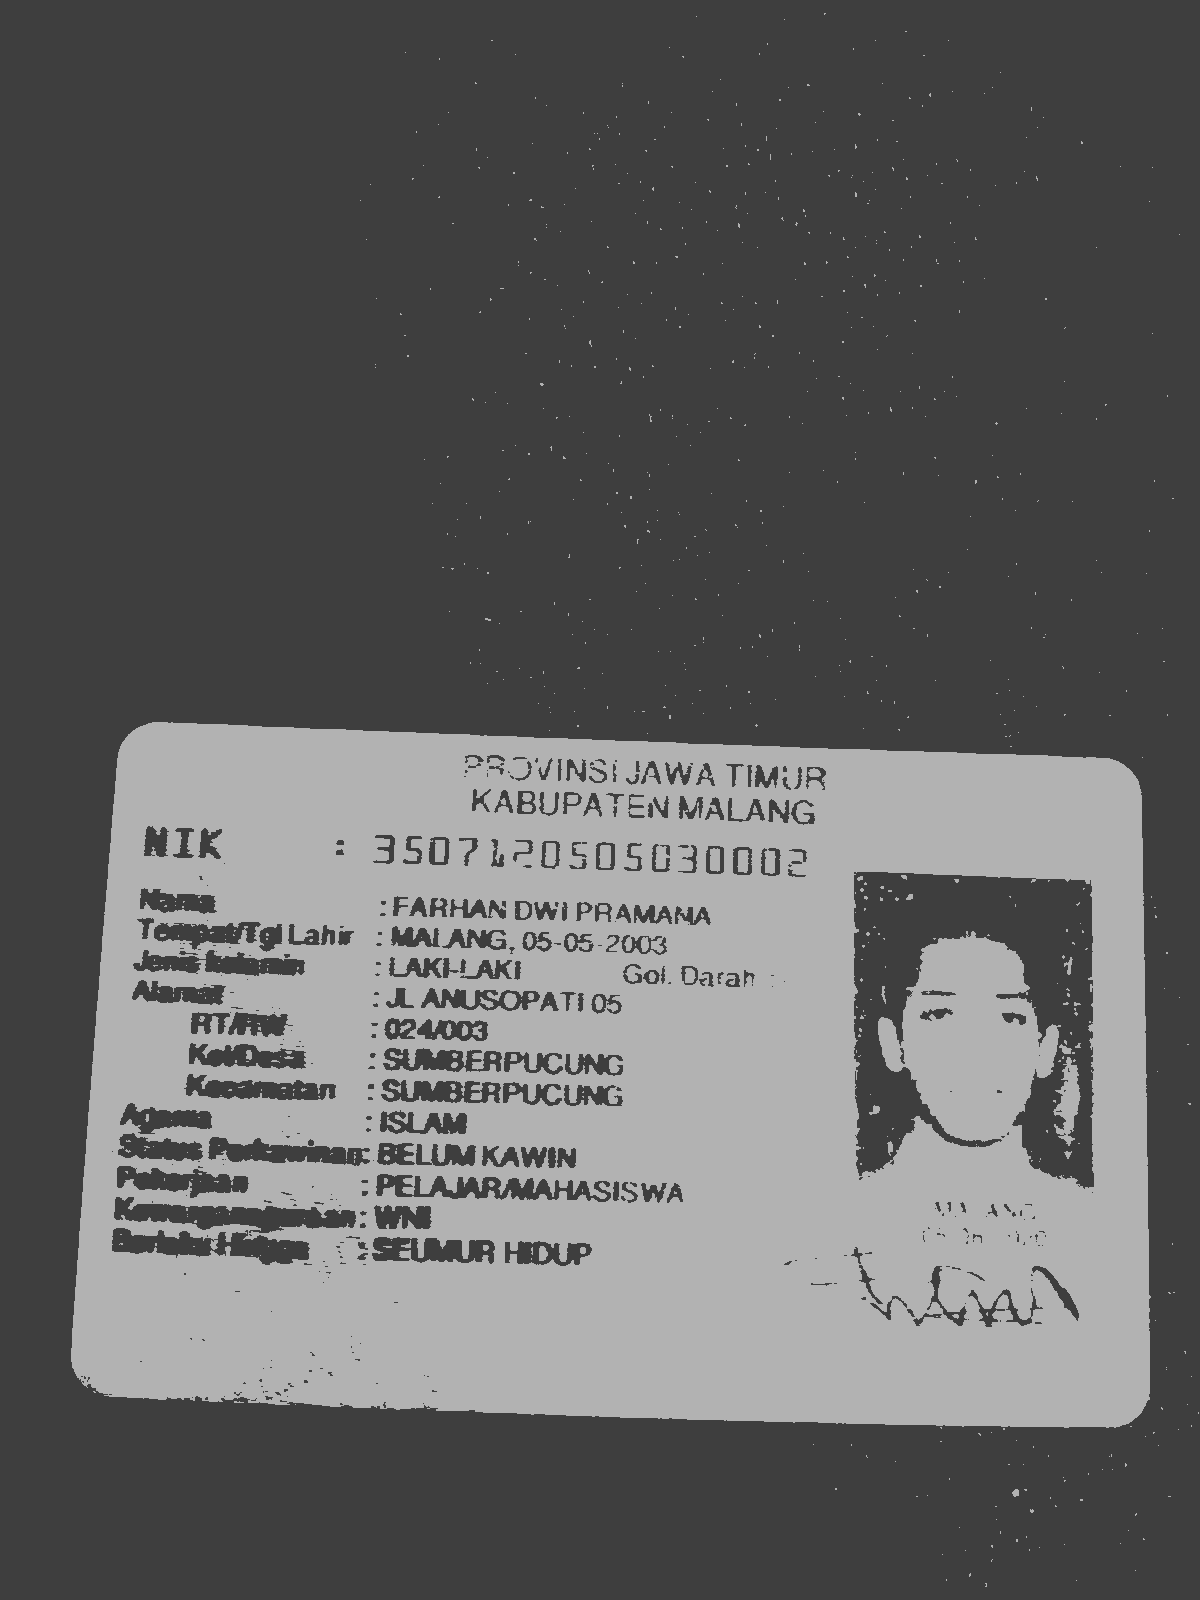

In [9]:
cv2_imshow(gray)

## Contour detection

In [10]:
# Apply thresholding to binarize the image
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_copy_contours = image.copy()

# Draw contours on the original image
cv2.drawContours(image_copy_contours, contours, -1, (0, 255, 0), 2)

array([[[127,  75,  22],
        [126,  74,  21],
        [123,  71,  18],
        ...,
        [143,  87,  28],
        [134,  78,  19],
        [128,  72,  13]],

       [[128,  76,  23],
        [127,  75,  22],
        [124,  72,  19],
        ...,
        [143,  87,  28],
        [135,  79,  20],
        [129,  73,  14]],

       [[130,  78,  25],
        [130,  78,  25],
        [127,  75,  22],
        ...,
        [144,  88,  29],
        [136,  80,  21],
        [131,  75,  16]],

       ...,

       [[ 86,  36,  16],
        [ 88,  38,  18],
        [ 89,  39,  19],
        ...,
        [137,  90,  36],
        [129,  82,  28],
        [123,  76,  22]],

       [[ 86,  36,  16],
        [ 88,  38,  18],
        [ 90,  40,  20],
        ...,
        [134,  87,  33],
        [128,  81,  27],
        [122,  75,  21]],

       [[ 87,  37,  17],
        [ 89,  39,  19],
        [ 90,  40,  20],
        ...,
        [130,  83,  29],
        [125,  78,  24],
        [120,  73,  19]]

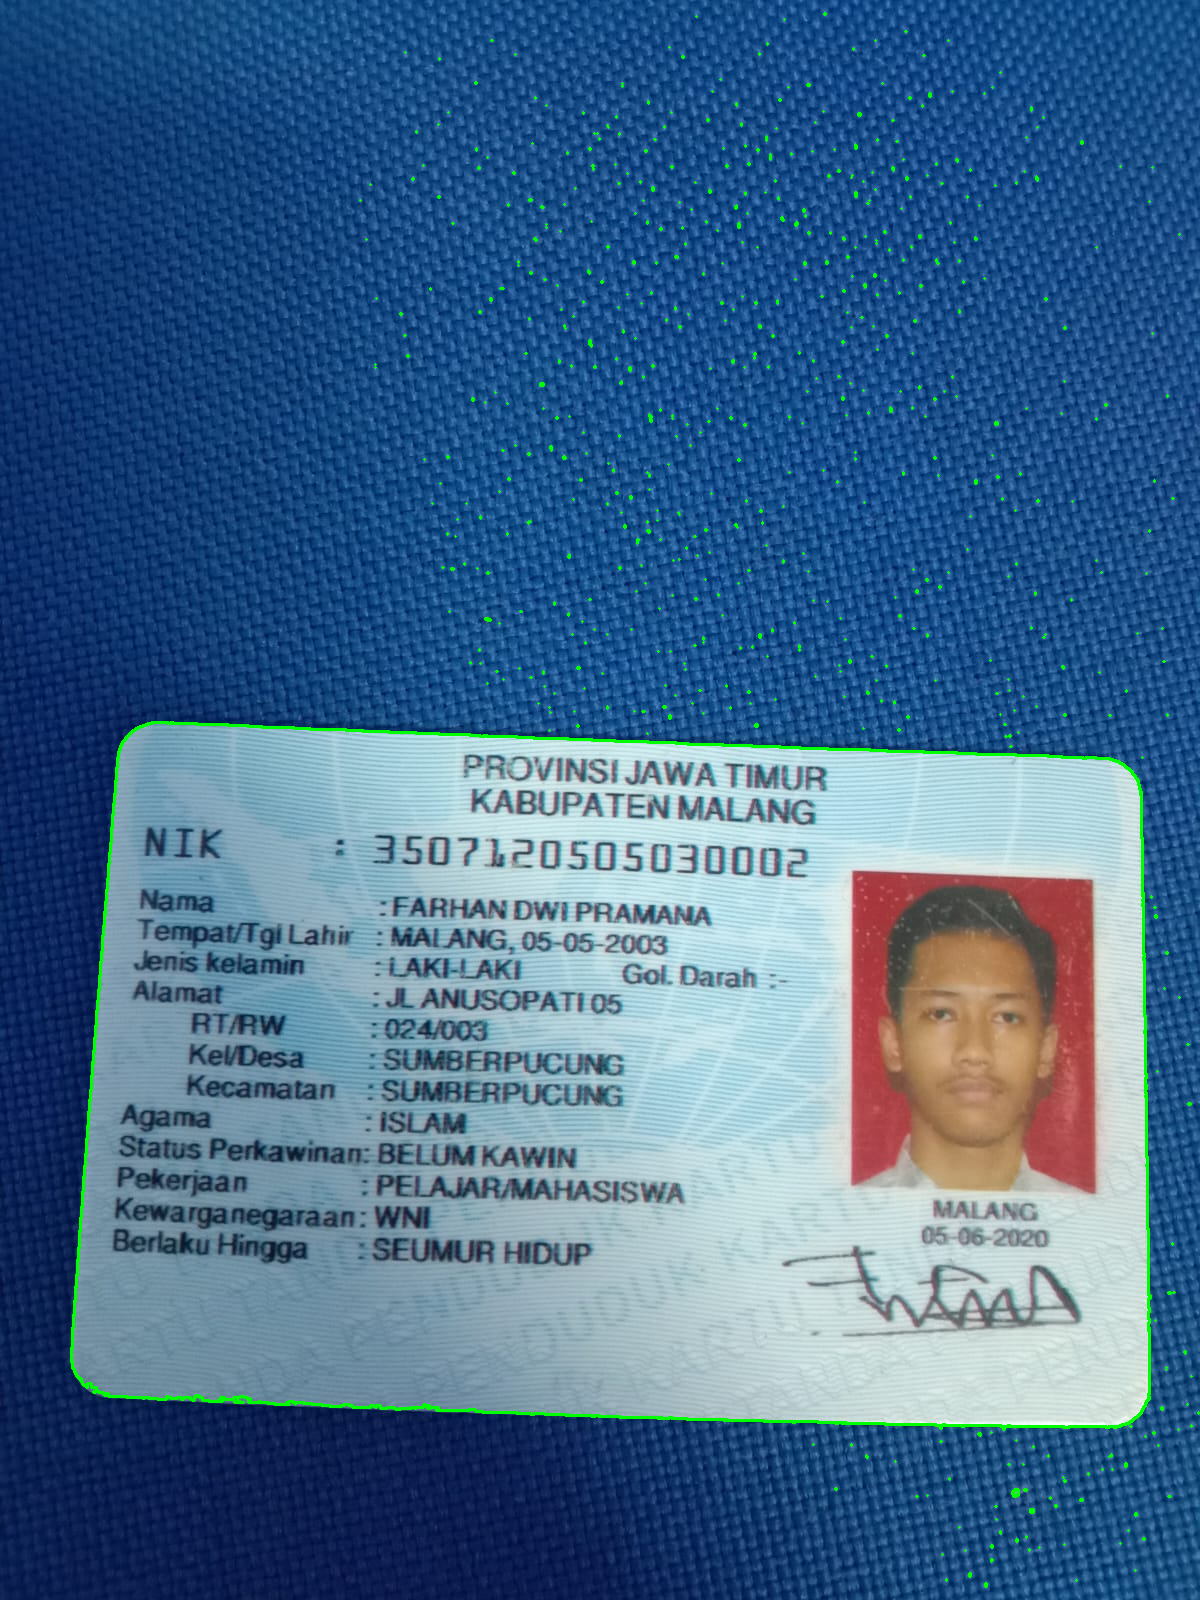

In [11]:
cv2_imshow(image_copy_contours)

## Mencari Contour terbesar

largest_contour_index:0
largest_contour_index:3
largest_contour_index:21
largest_contour_index:30
largest_contour_index:96


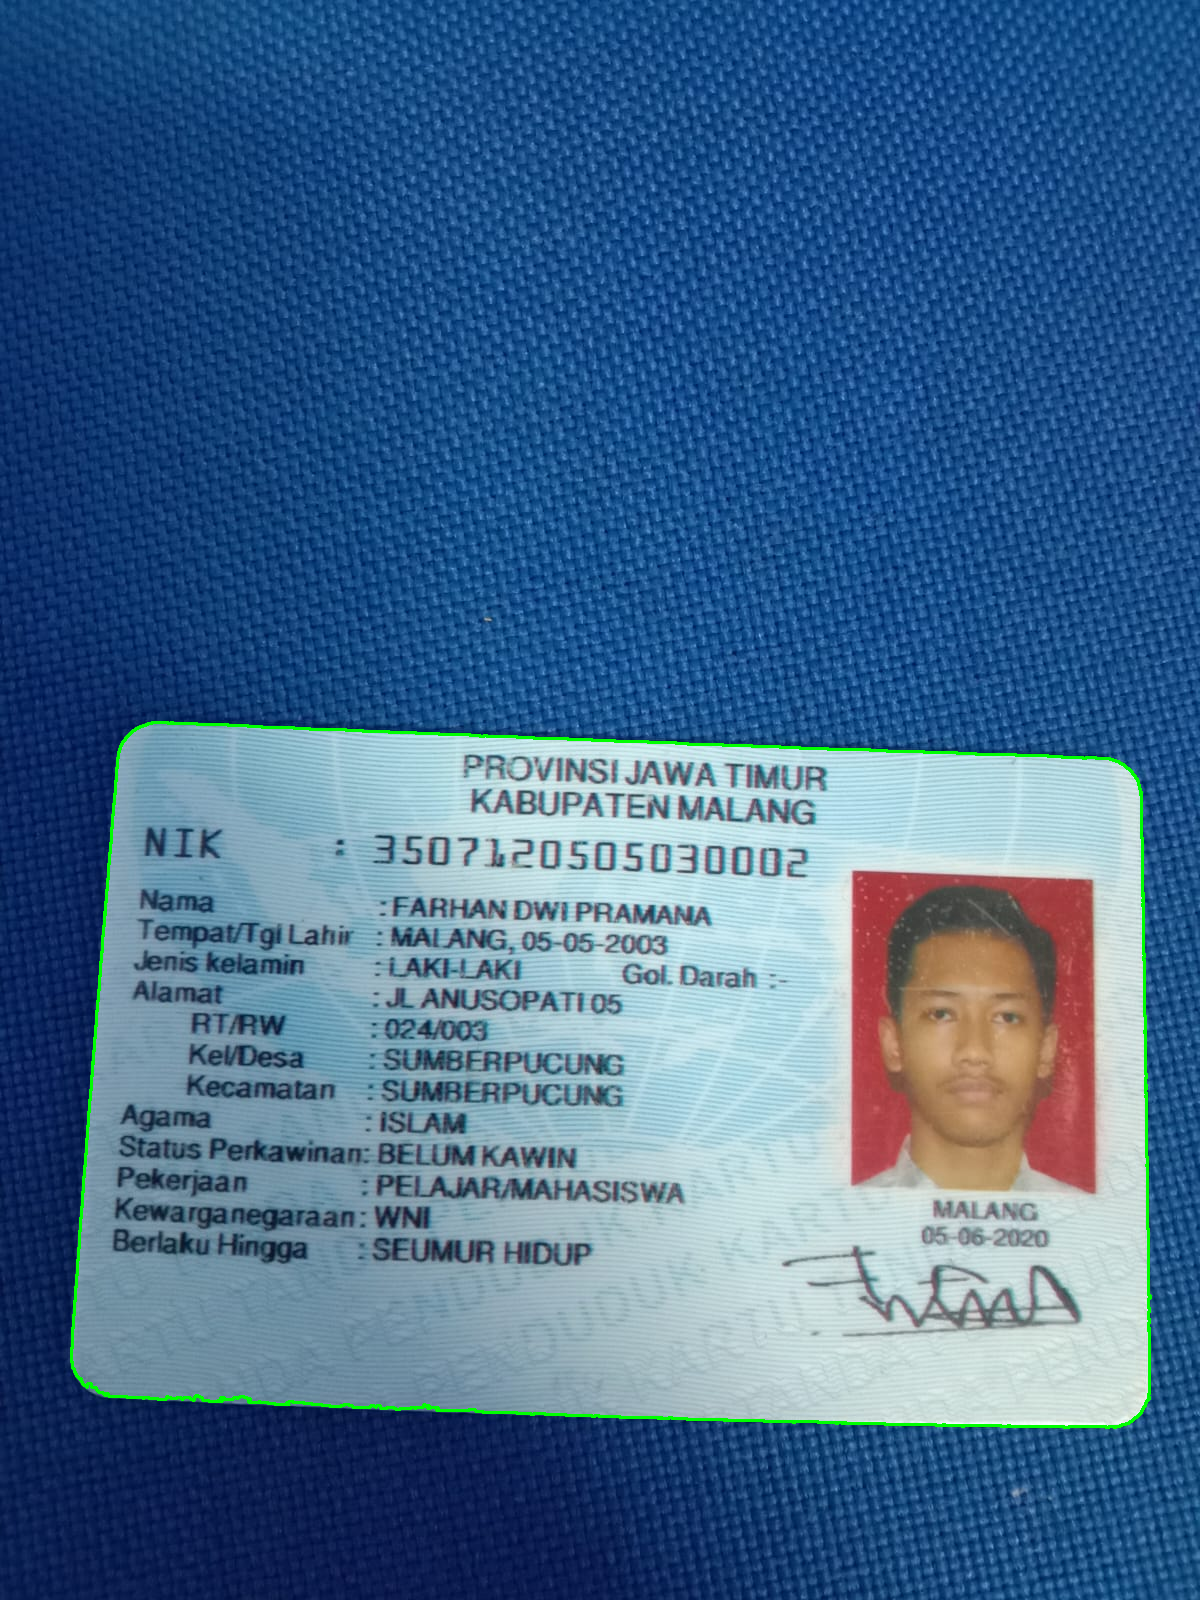

In [12]:
largest_area = 0
largest_contour_index = -1


for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > largest_area:
        largest_area = area
        largest_contour_index = i
        print(f"largest_contour_index:{largest_contour_index}")

largest_contour = contours[largest_contour_index]

cv2.drawContours(image, [largest_contour], -1, (0, 255, 0), 2)

cv2_imshow(image)


TODOS:

- pindahkan bagian dalam kontur ke gambar baru
- preprocess
- ocr

## Cropping

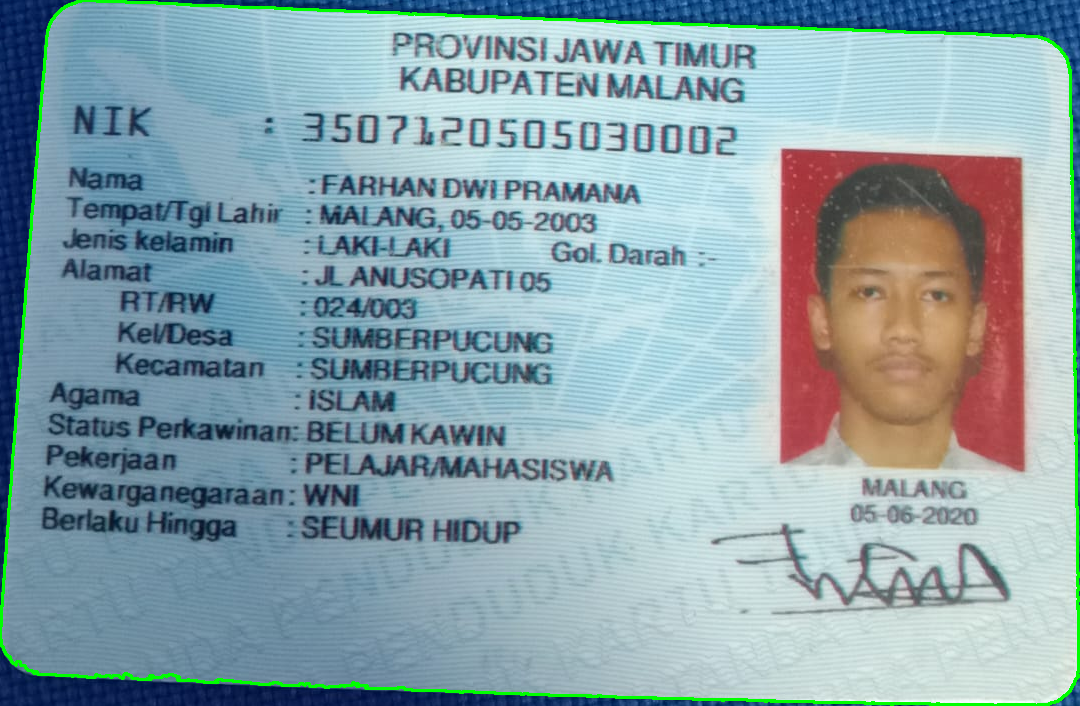

In [15]:
# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Extract the largest contour from the original image
cropped_image = image[y:y + h, x:x + w]

# Save the cropped image
cv2_imshow(cropped_image)

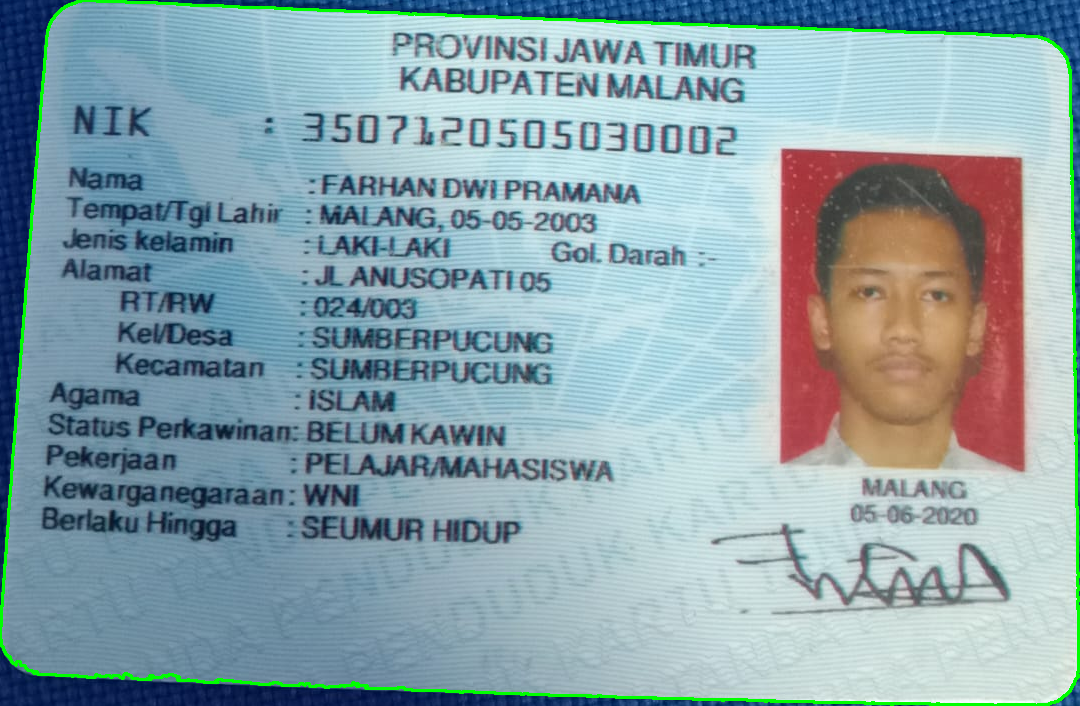

In [19]:
# # Get the bounding box of the largest contour
# x, y, w, h = cv2.boundingRect(largest_contour)

# # Create a black mask with the same size as the cropped image
# mask = np.zeros_like(cropped_image)

# # Draw the largest contour onto the mask
# cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), -1)

# # Invert the mask to create a mask for the outside area
# inverted_mask = cv2.bitwise_not(mask)

# # Convert inverted_mask to grayscale
# inverted_mask_gray = cv2.cvtColor(inverted_mask, cv2.COLOR_BGR2GRAY)

# # Apply bitwise operation with grayscale mask
# result = cv2.bitwise_and(cropped_image, cropped_image, mask=inverted_mask_gray)

# # Show the cropped image with black background
# cv2_imshow(result)